Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

 Para estos dos datasets ahora necesitas:

1- Importar los datos

In [1]:
import pandas as pd 

data_1 = pd.read_csv ('/datasets/project_sql_result_01.csv')
data_2 = pd.read_csv('/datasets/project_sql_result_04.csv')

2- Estudiar los datos que contienen

In [2]:
print(data_1.info())
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


3- Asegurarte de que los tipos de datos sean correctos

Se observa en ambos datasets que los tipos de datos son adecuados con la naturaleza de ellos.Es decir:
    - company_name es el nombre de la empresa de taxis y es de tipo OBJECT (texto)
    - dropoff_location_name son nombres de barrios y son datos de tipo OBJECT (texto)
    - trips_amount corresponde al total de viajes realizados y debe ser un número entero o un tipo de dato INT
    - average_ trips corresponde a un promedio de viajes, por lo que puede ser un número entero o decimal, por lo tanto que sea       un dato de tipo FLOAT es coherente con esto
    

4- identificar los 10 principales barrios en términos de finalización del recorrido

In [3]:
#para esto se ordenan los valores de la columna 'average_trips' del dataset que contiene este dato: data_2, de manera descendente
#y luego se muestran las primeras 10 filas

top_10 = data_2.sort_values(by='average_trips', ascending=False).head(10)

print(top_10)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


5- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

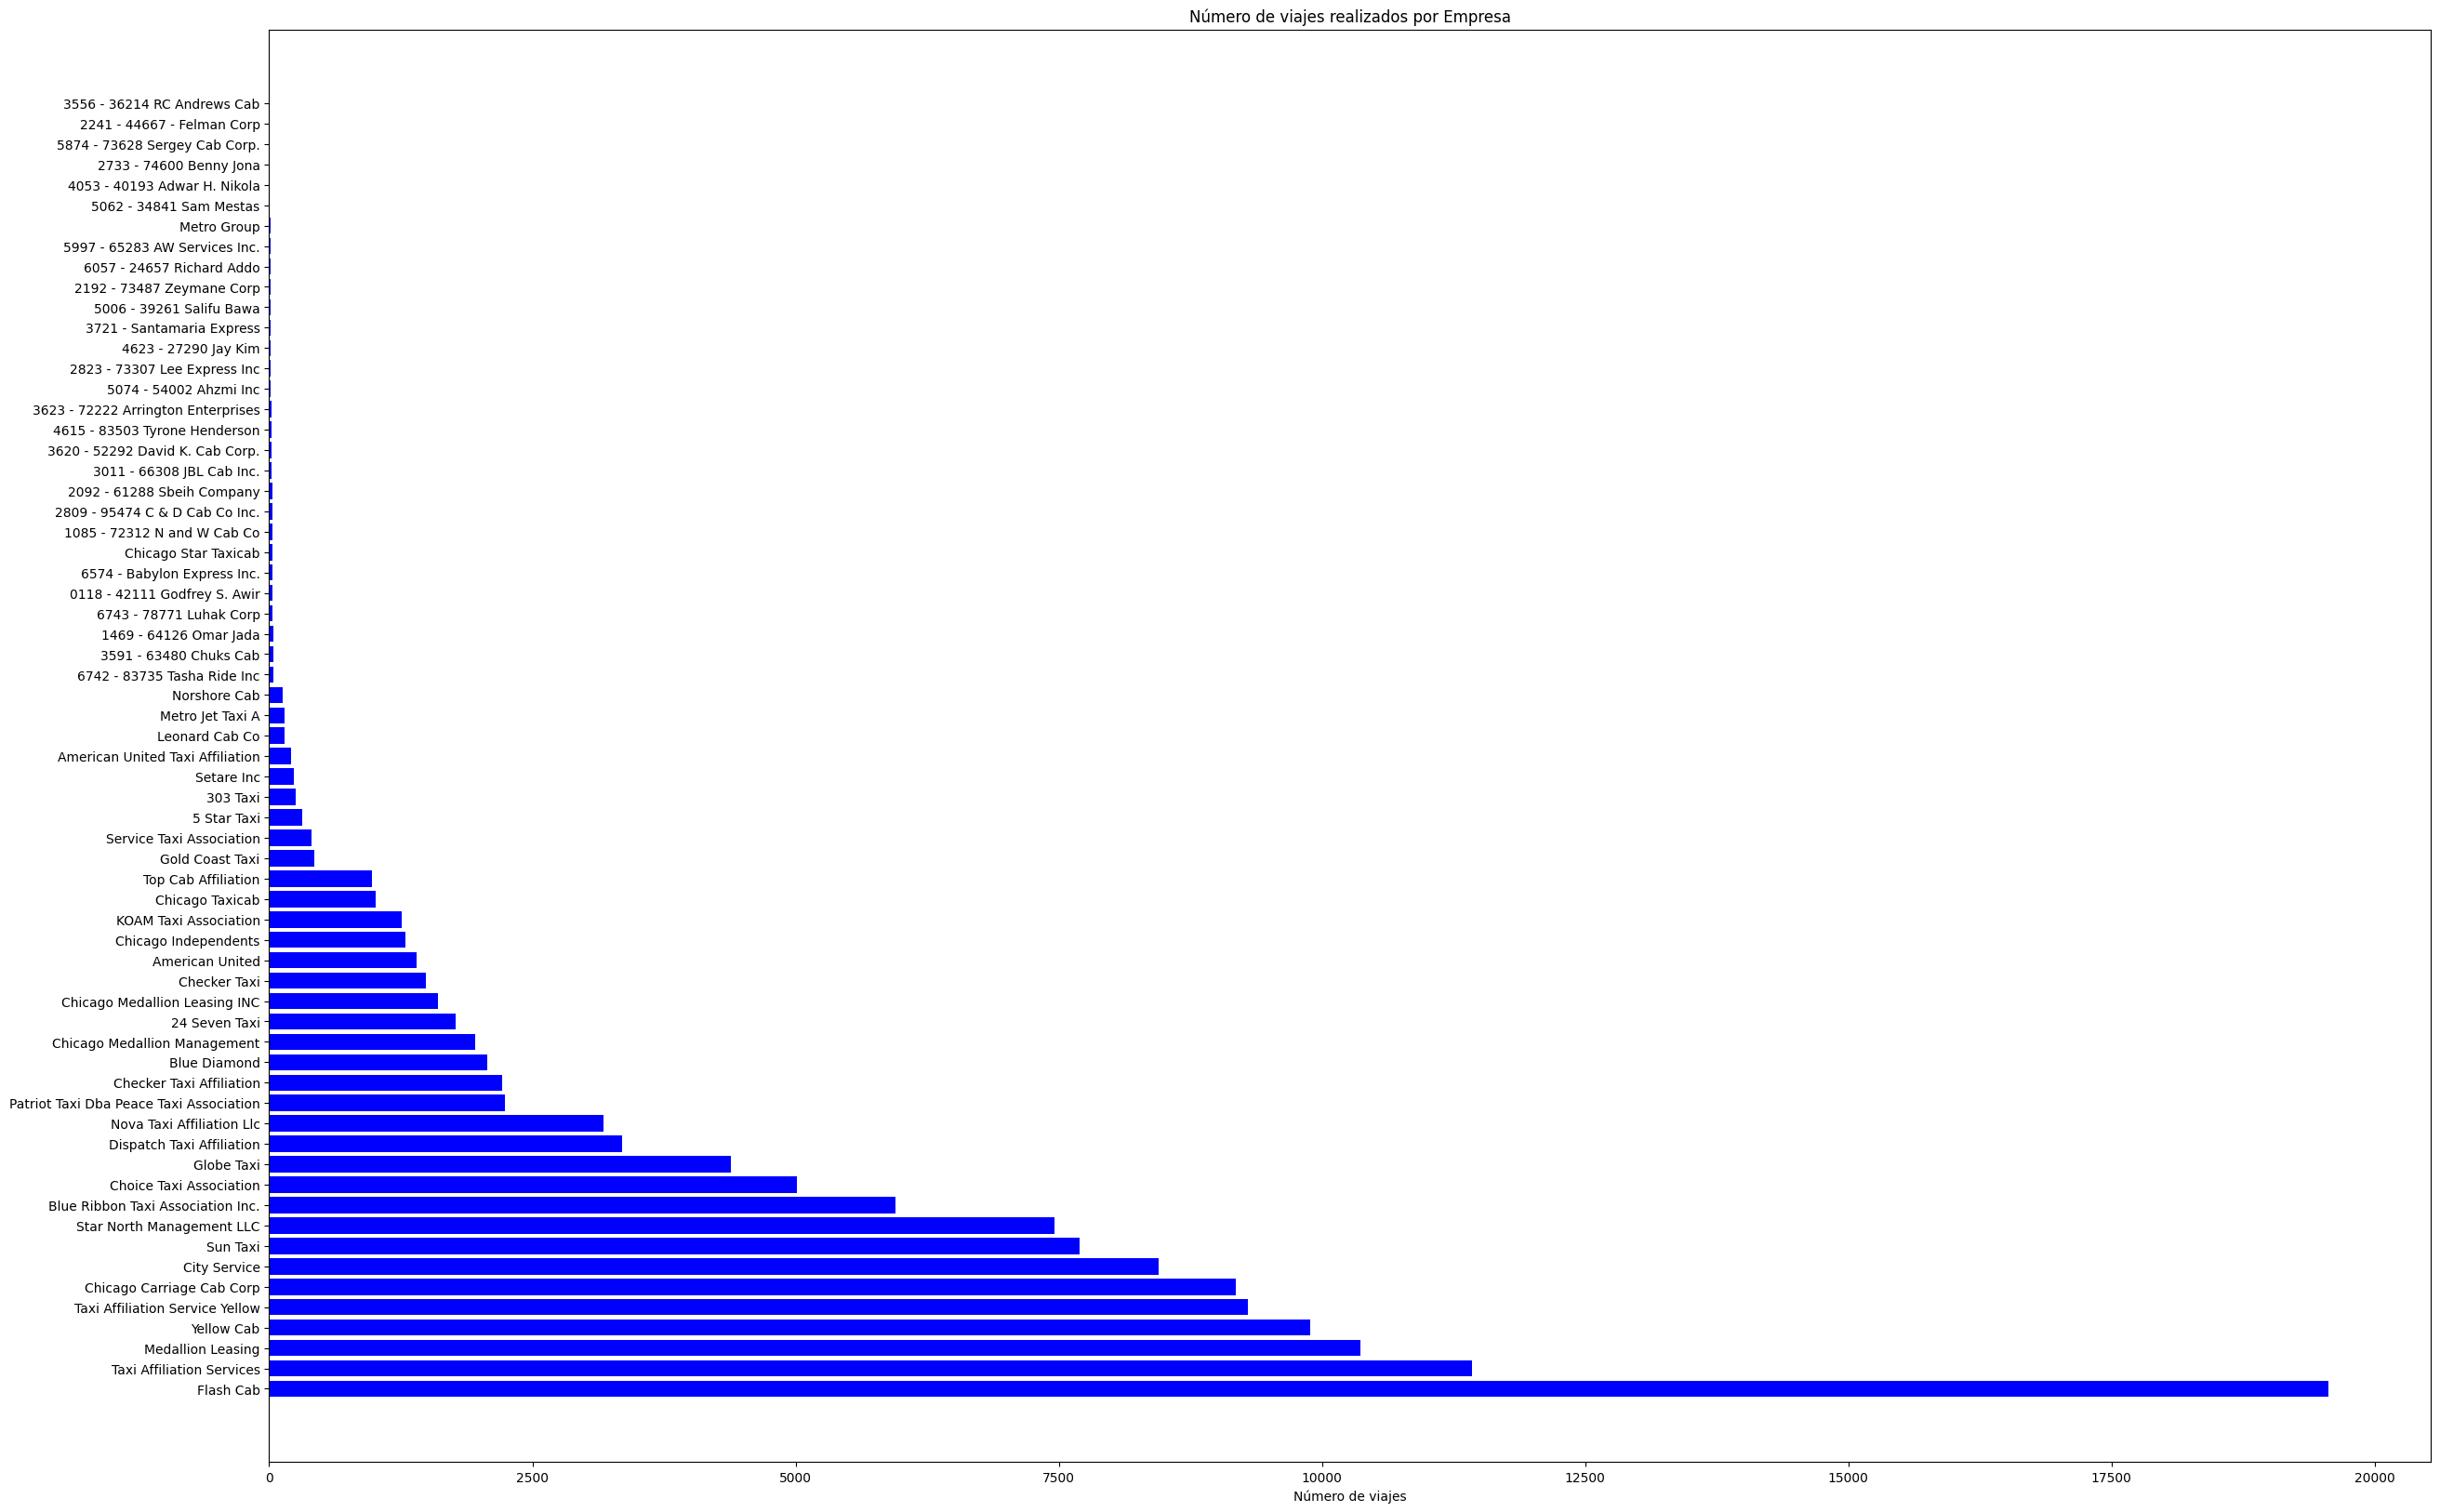

In [4]:
import matplotlib.pyplot as plt

# Graficar el número de viajes realizados por empresas de taxis 

plt.figure(figsize=(30, 20))
plt.barh(data_1['company_name'], data_1['trips_amount'], color='blue')
plt.xlabel('Número de viajes')
plt.title('Número de viajes realizados por Empresa')
plt.show()

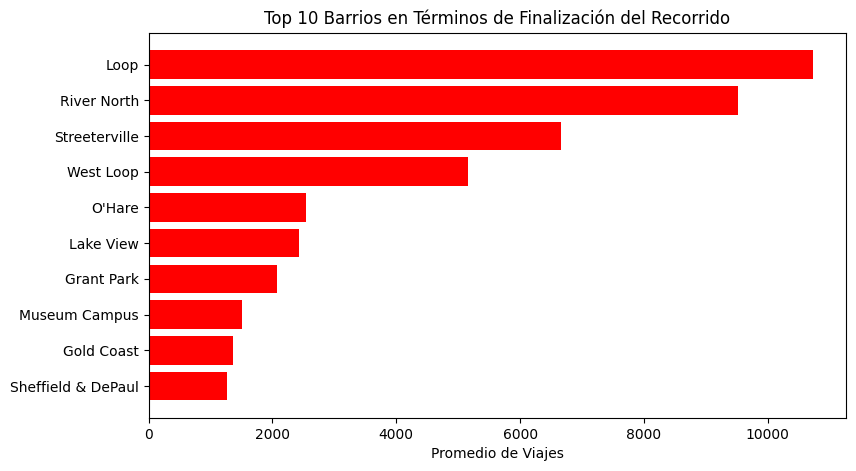

In [5]:
import matplotlib.pyplot as plt

# Graficar los 10 principales barrios por número de finalizaciones
plt.figure(figsize=(9, 5))
plt.barh(top_10['dropoff_location_name'], top_10['average_trips'], color='red')
plt.xlabel('Promedio de Viajes')
plt.title('Top 10 Barrios en Términos de Finalización del Recorrido')
plt.gca().invert_yaxis()  
plt.show()

6- sacar conclusiones basadas en cada gráfico y explicar los resultados

In [6]:
#observo datos relacionados a la cantidad de viajes realizados por cada compañía de taxis los días 15 y 16 de noviembre

top_10_taxis = data_1.sort_values(by='trips_amount', ascending=False).head(60)

print(top_10_taxis)

                               company_name  trips_amount
0                                 Flash Cab         19558
1                 Taxi Affiliation Services         11422
2                         Medallion Leasing         10367
3                                Yellow Cab          9888
4           Taxi Affiliation Service Yellow          9299
5                 Chicago Carriage Cab Corp          9181
6                              City Service          8448
7                                  Sun Taxi          7701
8                 Star North Management LLC          7455
9         Blue Ribbon Taxi Association Inc.          5953
10                  Choice Taxi Association          5015
11                               Globe Taxi          4383
12                Dispatch Taxi Affiliation          3355
13                Nova Taxi Affiliation Llc          3175
14  Patriot Taxi Dba Peace Taxi Association          2235
15                 Checker Taxi Affiliation          2216
16            

In [7]:
#se obtiene estadística descriptiva de ambos datasets para tener más contexto sobre los gráficos realizados.
print(data_1.describe())
print(data_2.describe())


       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


Sobre el dataset que contiene el número de viajes realizado por cada compañía los días 15 y 16 de noviembre:
    -la compañía que realizó mas viajes estos días fue Flash Cab con casi 20000 viajes
    -se observa que la mayor cantidad de viajes está concentrado en un cuarto de la población (compañías de taxis).Esto indica      que hay una pequeña porción de compañías que realiza el mayor porcentaje de viajes.
    -respecto al punto anterior, se puede decir también que la distribución de viajes no es equitativa para todas las copmañías      de taxis, lo que puede indicar que aquellas que consiguen menos viajes tengan problemas en su planificación de viajes,          tarifas, distancias, etc.
    -se podría intuir en primera instancia que existe un monopolio respecto a los viajes los dos días que se representan en el      dataset, por lo que aquellas compañías que tuvieron menos viajes deberían implementar alguna medida que ler permita            aumentar la cantidad de viajes en general.
    -se debe considerar que solo son los datos de dos días, por lo que para realizar conclusiones que lleven a medidas              concretas se debe estudiar la cantidad de viajes en períodos mas largos.
Sobre el dataset que contiene los 10 principales barrios por número de finalizaciones:
    -se muestran solos 10 barrios, por lo que visualmente la diferencia entre cantidad de viajes no es tan grande.
    -de todas maneras, se puede apreciar que en los 4 primeros barrios se concentra la mayor cantidad de viajes.Esto se puede        asociar a un comportamiento especial de los usuarios de esas zonas en el mes de noviembre.
    -se podrían considerar estartegias que permitan aprovechar estas 4 zonas donde se finalizaron más viajes y así 

Paso 5. Prueba de hipótesis (Python)

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos



In [8]:
#primero se carga el dataset
import pandas as pd 
from scipy import stats

data_3 = pd.read_csv ('/datasets/project_sql_result_07.csv')

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [9]:
#H0 :La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos
#H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

In [10]:
#se deben clasificar los datos, es decir, separar en la cantidad de viajes realizados un día sábado lluvioso (clasidicado
#como 'Bad') y la cantidad de viajes realizados un día sábado con buen clima (clasificado como 'Good')

#primero debo asegurarme que los datos de 'start_ts' son de tipo datetime
data_3['start_ts'] = pd.to_datetime(data_3['start_ts'])

# se filtran los datos por condiciones climáticas y especificando el día (sábado = 5)
rainy_saturdays = data_3[(data_3['weather_conditions'] == 'Bad') & (data_3['start_ts'].dt.dayofweek == 5)]
good_saturdays = data_3[(data_3['weather_conditions'] == 'Good') & (data_3['start_ts'].dt.dayofweek == 5)]

print(rainy_saturdays)
print(good_saturdays)

                start_ts weather_conditions  duration_seconds
6    2017-11-04 16:00:00                Bad            2969.0
30   2017-11-18 12:00:00                Bad            1980.0
34   2017-11-04 17:00:00                Bad            2460.0
51   2017-11-04 16:00:00                Bad            2760.0
52   2017-11-18 12:00:00                Bad            2460.0
...                  ...                ...               ...
1031 2017-11-18 12:00:00                Bad            2560.0
1032 2017-11-18 10:00:00                Bad            1908.0
1053 2017-11-18 12:00:00                Bad            2400.0
1061 2017-11-18 16:00:00                Bad            2186.0
1067 2017-11-04 16:00:00                Bad            2834.0

[180 rows x 3 columns]
                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good            2410.0
1    2017-11-25 14:00:00               Good            1920.0
2    2017-11-25 12:00:00               Good   

In [11]:
#se debe calcular la duración promedio de cada viaje en sábados lluviosos y no lluviosos

mean_rainy = rainy_saturdays['duration_seconds'].mean()
mean_good = good_saturdays['duration_seconds'].mean()


2427.2055555555557
1999.6756756756756


In [12]:
#se muestra la cantidad de viajes realizado tanto en sábados lluviosos como no lluviosos

print("\nCantidad de viajes en sábados lluviosos:", len(rainy_saturdays))
print("Cantidad de viajes en sábados con buen clima:", len(good_saturdays))


Cantidad de viajes en sábados lluviosos: 180
Cantidad de viajes en sábados con buen clima: 888


In [13]:
# se realiza prueba t
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], good_saturdays['duration_seconds'], equal_var=False)

# Resultados
print(f'Duración promedio en sábados lluviosos: {mean_rainy} segundos')
print(f'Duración promedio en sábados buenos: {mean_good} segundos')
print(f'Valor p: {p_value}')

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa.")
else:
    print("No rechazamos la hipótesis nula: no hay suficiente evidencia para afirmar que hay una diferencia.")

Duración promedio en sábados lluviosos: 2427.2055555555557 segundos
Duración promedio en sábados buenos: 1999.6756756756756 segundos
Valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula: hay una diferencia significativa.



Explica:
- Cómo planteaste las hipótesis nula y alternativa
  Por definición, la hipótesis nula (H0) expresa la idea de que no hay diferencia entre los grupos (que, en este caso,           significa que no hay diferencia entre la duración de los viajes un día sábado con lluvia y uno sin lluvia.
  Para probar que H0 se cumple, primero se crea una distribución basada en este supuesto.Luego se establece un umbral para la     significación estadística; esto permitirá determinar si rechazamos H0 o no.
- Qué criterio usaste para probar las hipótesis y por qué
  se utilizó una prueba t pues no conocemos la varianza de los datos.Adem´pas, se considera una significancia de un 5%           (alpha)Sabemos que un valor P> alpha, no se debe rechazar H0, por lo que en este caso, se rechaza H0 y se concliye que si         existe una diferencia significativa en la duración de los viajes un sábado lluvioso con un sábado sin lluvia.
